In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *
import boost_histogram as bh

Welcome to JupyROOT 6.26/02


In [2]:
mu = 0.0
sigma = 0.2
num = 500_000

data = pd.DataFrame({'x' : np.random.gumbel(mu, sigma*5, num),
                     'y' : np.random.normal(mu+0.2, sigma, num),
                     'z' : np.random.normal(mu+1.0, sigma, num)})

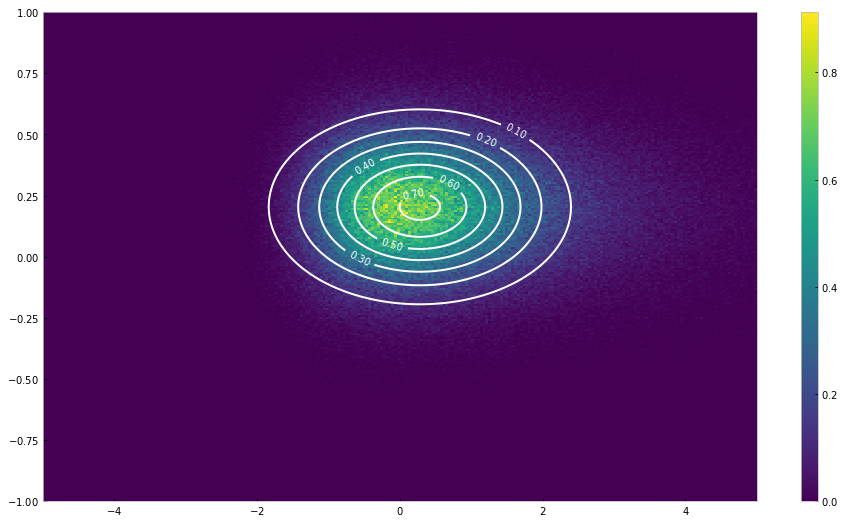

In [3]:
testHist = Hist2D(xrange=[-5.0,5.0], xbins=250, yrange=[-1.0,1.0], ybins=250)
testHist.fill(data.x, data.y)
testHist.plot()
testHist.fitGausian(label=True)

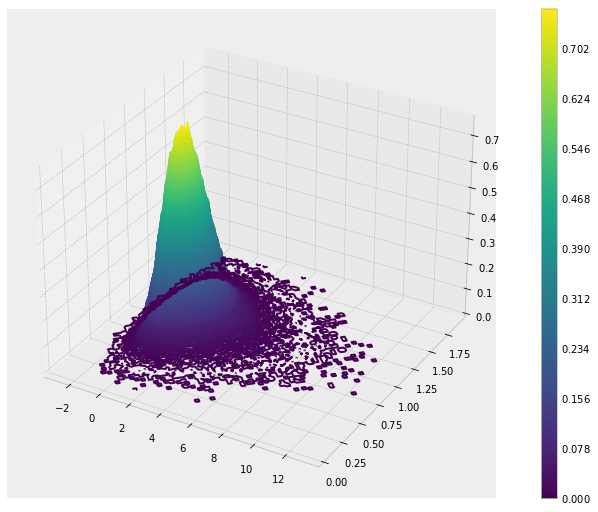

In [4]:
testHist = Hist2D(data.x, data.z)
testHist.plot3D(zeros=True)
plt.show()

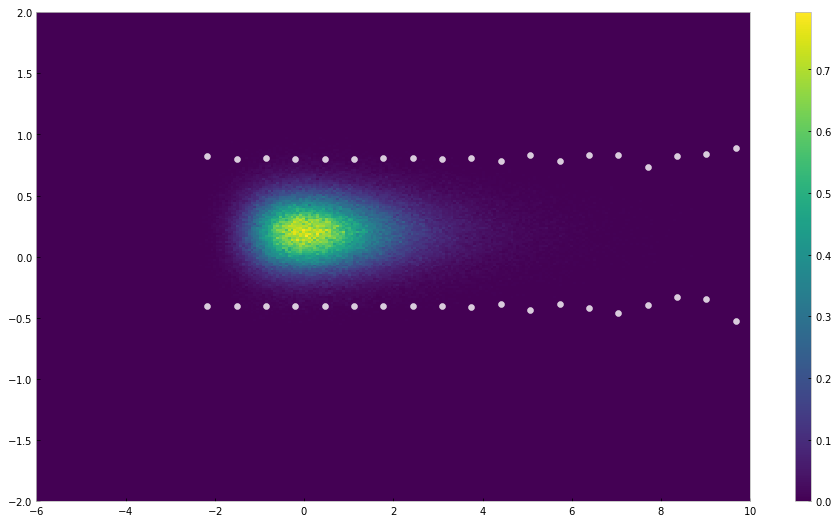

In [5]:
testHist = Hist2D(xrange=[-6.0,10.0], xbins=250, yrange=[-2.0,2.0], ybins=250)
testHist.fill(data.x, data.y)
#testHist.fill(data.x, data.z)
fig, ax = plt.subplots(ncols=1)
testHist.plot(ax=ax, zeros=True)
fits, topFit, botFit = testHist.fitSliceX(fit_range=[-2.5,10], num_slices=20)
topFit.scatter(color='w')
botFit.scatter(color='w')

plt.show()

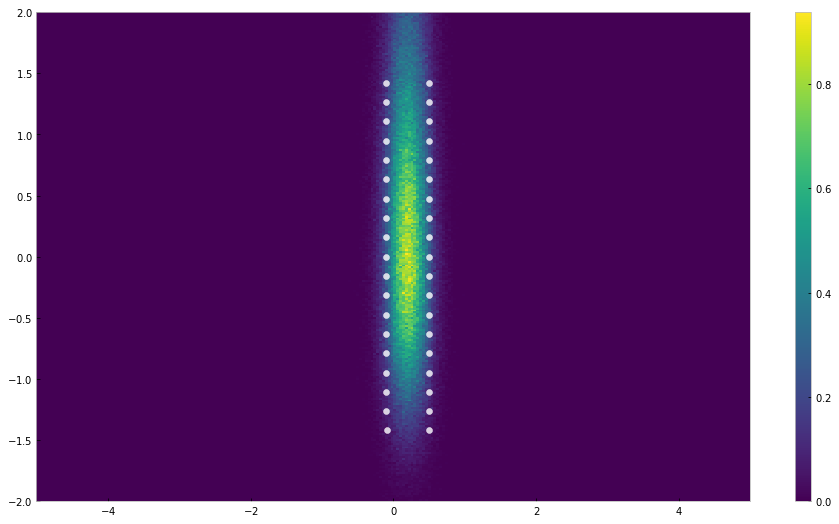

In [6]:
testHist = Hist2D(xrange=[-5,5.0], xbins=250, yrange=[-2.0,2.0], ybins=250)
testHist.fill(data.y, data.x)
fig, ax = plt.subplots(ncols=1)
testHist.plot(ax=ax, zeros=True)
fits, leftFit, rightFit = testHist.fitSliceY(fit_range=[-1.5, 1.5], num_slices=20, NSIMA=1.5)

leftFit.scatter(color='w')
rightFit.scatter(color='w')

plt.show()
